In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d prasadvpatil/mrl-dataset

 89% 20.0M/22.6M [00:02<00:00, 16.9MB/s]
100% 22.6M/22.6M [00:02<00:00, 11.5MB/s]


In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! unzip /content/mrl-dataset.zip

Archive:  /content/mrl-dataset.zip
  inflating: train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00015_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00016_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00017_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s000

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [ ]:
train_dir = "dataset/training_set/"
test_dir = "dataset/test_set/"

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [ ]:
model.compile(optimizer = 'adam', loss = "hinge", metrics = ['accuracy'])

In [ ]:
#model.add(Dense(2,kernel_regularizer = l2(0.01),activation= "softmax"))
#model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
history = model.fit(x = train_dataset, validation_data = validation_dataset, epochs=4)

Epoch 1/4
100/100 [==============================] - 5s 46ms/step - loss: 1.2573 - accuracy: 0.5000 - val_loss: 1.2566 - val_accuracy: 0.5000
Epoch 2/4
100/100 [==============================] - 5s 46ms/step - loss: 1.2564 - accuracy: 0.5000 - val_loss: 1.2558 - val_accuracy: 0.5000
Epoch 3/4
100/100 [==============================] - 5s 46ms/step - loss: 1.2556 - accuracy: 0.4931 - val_loss: 1.2552 - val_accuracy: 0.5000
Epoch 4/4
100/100 [==============================] - 5s 46ms/step - loss: 1.2552 - accuracy: 0.4906 - val_loss: 1.2546 - val_accuracy: 0.5000


In [ ]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize

In [ ]:
%matplotlib inline

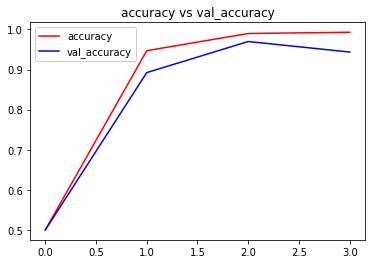

In [ ]:
#fig, ax = plt.subplots()
plt.plot(h['accuracy'],'r',label='accuracy')
plt.plot( h['val_accuracy'],'b',label='val_accuracy')
plt.title("accuracy vs val_accuracy")
plt.legend(framealpha=1, frameon=True);

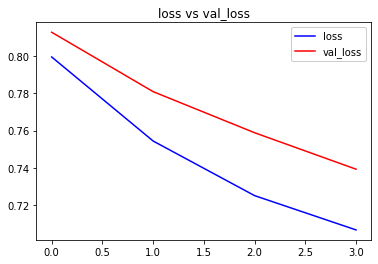

In [ ]:
plt.plot(h['loss'],'b',label='loss')
plt.plot(h['val_loss'],c='red',label='val_loss')
plt.title("loss vs val_loss")
plt.legend()
plt.legend(framealpha=1, frameon=True);